In [1]:
# Modelo de Vale do Sousa (50x1 anos)
# Versão 20-04-2022

In [1]:
# Vertices+Conselhos

file = open('UG_Vertice_Concelho.txt')
nlin = -1
vert4MU = {}
conc4MU = {}

MUNames = []
MU4conc = {'Paiva':[], 'Penafiel':[], 'Paredes':[]}

xmin =  100000000000
xmax = -100000000000
ymin =  100000000000
ymax = -100000000000

for line in file:        
    nlin += 1
    if nlin == 0:
        continue      
    lex = line.split()    
    
    if nlin < 5 or nlin > 54405:
        continue
        
    if lex[0] not in vert4MU:
        vert4MU[lex[0]] = []
        conc4MU[lex[0]] = lex[4]
        MUNames.append(lex[0])        
    
    x = float(lex[2])
    y = float(lex[3])
    vert4MU[lex[0]].append((x,y))   
    
    if xmin > x : xmin = x 
    if xmax < x : xmax = x 
    if ymin > y : ymin = y 
    if ymax < y :
        ymax = y
        nymax = lex[0]
        
    MU4conc[lex[4]].append(lex[0])        
        
file.close()

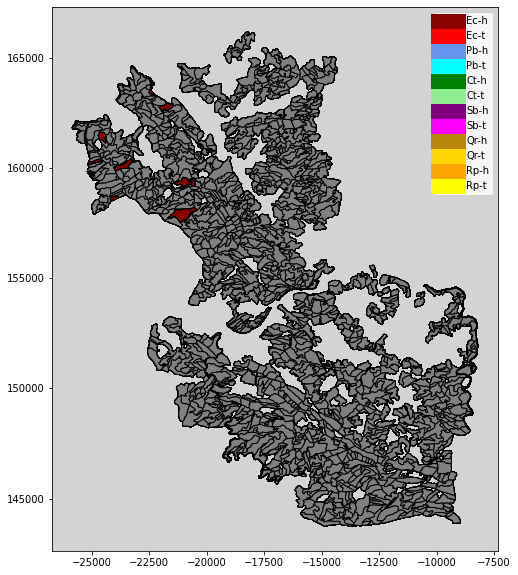

In [47]:
#%matplotlib notebook 
import matplotlib.pyplot as plt

Colors = {'Ec-h':'darkred', 'Ec-t':'red', 'Pb-h':'cornflowerblue','Pb-t':'cyan',
          'Ct-h':'green', 'Ct-t':'lightgreen','Sb-h':'purple', 'Sb-t':'magenta',
          'Qr-h':'darkgoldenrod', 'Qr-t':'gold','Rp-h':'orange', 'Rp-t':'yellow','No':'gray'}

fig = plt.figure(figsize=(8,10))
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Ec-h'],   label='Ec-h')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Ec-t'],  label='Ec-t')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Pb-h'],   label='Pb-h')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Pb-t'],  label='Pb-t')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Ct-h'],   label='Ct-h')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Ct-t'],  label='Ct-t')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Sb-h'],   label='Sb-h')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Sb-t'],  label='Sb-t')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Qr-h'],   label='Qr-h')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Qr-t'],  label='Qr-t')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Rp-h'],   label='Rp-h')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Colors['Rp-t'],  label='Rp-t')
plt.plot([-25000, -25010], [165000, 165010], lw=17, c='lightgray')
plt.legend() 

unList = ['9','10','11','12','13','14','167', '451']    
   
for unit in unList:    
    xx = []
    yy = []
    for v in vert4MU[unit]:
        xx.append(v[0])
        yy.append(v[1])
    #conc = conc4MU[unit]
    clr = 'yellow'
    #plt.fill(xx, yy, facecolor=clr, edgecolor='black', linewidth=1)

    
fy= open("MapInputFile.txt", "r")
lines=fy.readlines()

for year in range(2020, 2070):
    for unit in MUNames:    
        xx = []
        yy = []
        for v in vert4MU[unit]:
            xx.append(v[0])
            yy.append(v[1])
        plt.fill(xx, yy, facecolor='gray', edgecolor='black', linewidth=1)
    
    for line in lines:
        pYear = int(line.split(',')[1])
        if(pYear == year):
            unit = int(line.split(',')[0])
            act = (line.split(',')[2][:-1])
            xx = []
            yy = []            
            for v in vert4MU[str(unit)]:
                xx.append(v[0])
                yy.append(v[1])
                plt.fill(xx, yy, c=Colors[str(act)], edgecolor='black', linewidth=1)
       
    plt.savefig('MapOutput/Map_'+str(year),dpi=100)